In [1]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pytorch_lightning as pl
import torch.nn.functional as F

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy  as np

import json
import os
import glob

import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_ROOT = "../data/SensorData/"
user_file_prefix = "User"

TRAIN_FOLDER_PATH = os.path.join(DATA_ROOT, "train")
TEST_FOLDER_PATH = os.path.join(DATA_ROOT, "test")
os.makedirs(TRAIN_FOLDER_PATH, exist_ok=True)
os.makedirs(TEST_FOLDER_PATH, exist_ok=True)

data_files = sorted(glob.glob(os.path.join(DATA_ROOT, f"{user_file_prefix}*.csv")))
print(data_files)

['../data/SensorData/User00.csv', '../data/SensorData/User01.csv', '../data/SensorData/User02.csv', '../data/SensorData/User03.csv', '../data/SensorData/User04.csv', '../data/SensorData/User05.csv', '../data/SensorData/User06.csv', '../data/SensorData/User07.csv', '../data/SensorData/User08.csv', '../data/SensorData/User09.csv', '../data/SensorData/User10.csv', '../data/SensorData/User11.csv', '../data/SensorData/User12.csv', '../data/SensorData/User13.csv', '../data/SensorData/User14.csv', '../data/SensorData/User15.csv']


In [5]:
temp_dict_keys = [os.path.splitext(os.path.basename(f))[0] for f in data_files]
temp_dict_keys

['User00',
 'User01',
 'User02',
 'User03',
 'User04',
 'User05',
 'User06',
 'User07',
 'User08',
 'User09',
 'User10',
 'User11',
 'User12',
 'User13',
 'User14',
 'User15']

In [6]:
save_filename_list = [(f"{identifier}.npy", f"{identifier}_label.npy") for identifier in temp_dict_keys]
save_filename_list

[('User00.npy', 'User00_label.npy'),
 ('User01.npy', 'User01_label.npy'),
 ('User02.npy', 'User02_label.npy'),
 ('User03.npy', 'User03_label.npy'),
 ('User04.npy', 'User04_label.npy'),
 ('User05.npy', 'User05_label.npy'),
 ('User06.npy', 'User06_label.npy'),
 ('User07.npy', 'User07_label.npy'),
 ('User08.npy', 'User08_label.npy'),
 ('User09.npy', 'User09_label.npy'),
 ('User10.npy', 'User10_label.npy'),
 ('User11.npy', 'User11_label.npy'),
 ('User12.npy', 'User12_label.npy'),
 ('User13.npy', 'User13_label.npy'),
 ('User14.npy', 'User14_label.npy'),
 ('User15.npy', 'User15_label.npy')]

## User00 train_data EDA

In [58]:
user00_data_file, user00_label_file = save_filename_list[0]

In [59]:
features = np.load(os.path.join(TRAIN_FOLDER_PATH, user00_data_file))
label = np.load(os.path.join(TRAIN_FOLDER_PATH, user00_label_file))

In [60]:
print("feature shape", features.shape)
print("label shape", label.shape)

feature shape (12753, 256, 42)
label shape (12753,)


In [61]:
first_feature, first_label = features[0], label[0]

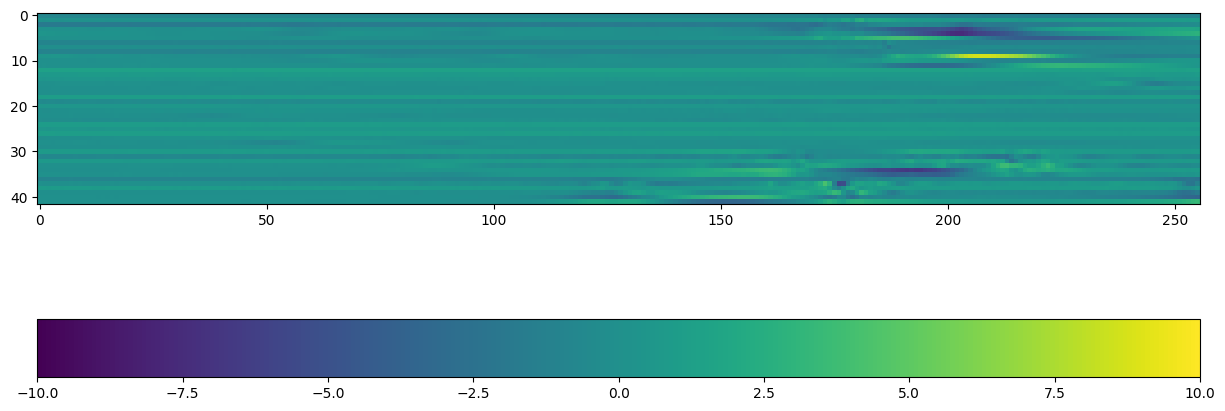

In [62]:
plt.figure(figsize=(15, 10))
plt.imshow(first_feature.transpose(), vmin=-10, vmax=10)
plt.colorbar(orientation="horizontal")

In [63]:
missing_sensor_id = 1
features[:, :, missing_sensor_id*6:(missing_sensor_id+1)*6] = 0

In [64]:
first_feature, first_label = features[0], label[0]

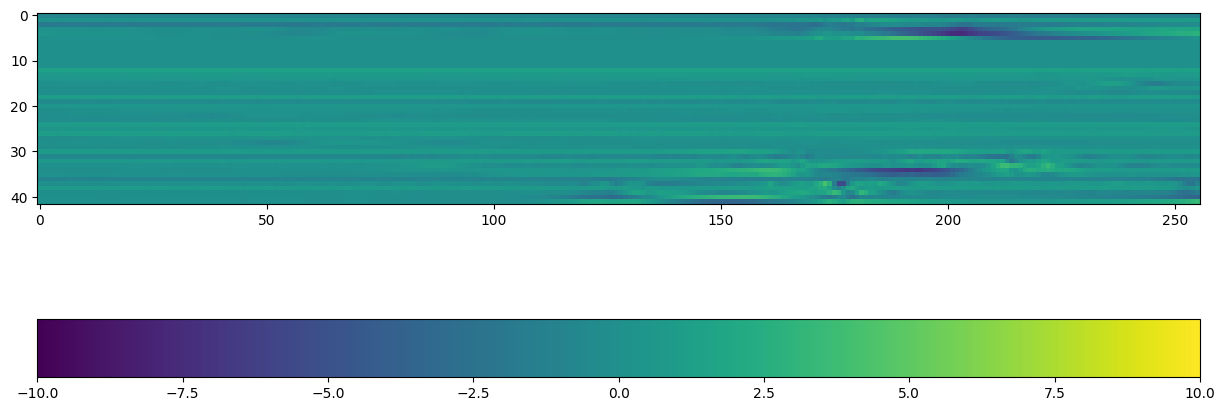

In [65]:
plt.figure(figsize=(15, 10))
plt.imshow(first_feature.transpose(), vmin=-10, vmax=10)
plt.colorbar(orientation="horizontal")